In [74]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [8]:
emp=pd.read_csv('empl.csv')
emp.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [9]:
emp.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

In [10]:
emp.dtypes

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

In [11]:
emp.tail()

,SNo,Name,Age,City,Country,Salary
17,19,Lee,31.0,Edmonto,Canada,NaN
18,20,Andrew,34.0,Congo,Africa,34432.0
19,21,soham,32.0,Angola,Africa,34534.0
20,22,Grig,26.0,Finland,Europe,33451.0
21,23,Kiara,27.0,London,Europe,NaN


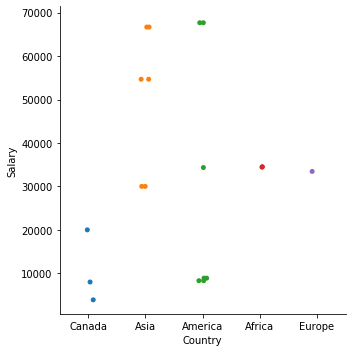

In [12]:
sns.catplot(x='Country',y='Salary',data=emp)

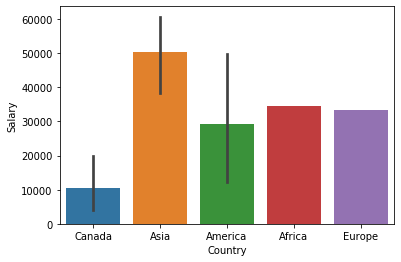

In [13]:
sns.barplot(x='Country',y='Salary',data=emp)

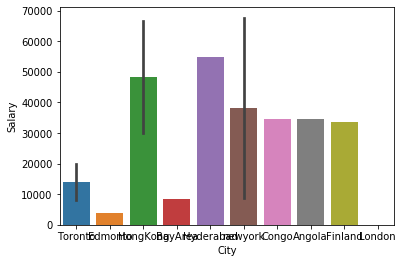

In [15]:
sns.barplot(x='City',y='Salary',data=emp)
plt.show()

In [32]:
emp['Age'].fillna(emp['Age'].median(),inplace=True)

In [33]:
emp['Age'].isnull().sum()

0

In [42]:
emp['City'].fillna(emp['Age'].mode()[0],inplace=True)

In [43]:
emp['City'].isnull().sum()

0

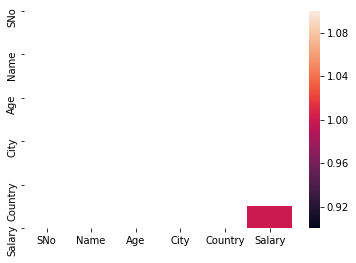

In [44]:
sns.heatmap(emp.isnull().corr())

In [45]:
emp['Salary'].fillna(emp['Salary'].mean(),inplace=True)
emp['Salary'].isnull().sum()

0

In [46]:
emp.skew()

SNo      -0.042047
Age       1.120529
Salary    0.308034
dtype: float64

In [47]:
import numpy as np
for col in emp.columns:
    if emp.skew().loc[col]>0.55:
        emp[col]=np.log1p(emp[col])

KeyError: 'Name'

In [50]:
emp.drop(['Name'],axis=1,inplace=True)
emp.head()

,SNo,Age,City,Country,Salary
0,1,28.0,Toronto,Canada,20000.000000
1,2,31.0,Edmonto,Canada,3900.000000
2,3,34.0,Toronto,Canada,8000.000000
3,4,26.0,HongKong,Asia,66672.000000
4,5,30.0,31,America,33739.947368


In [53]:
import numpy as np
for col in emp.columns:
    if emp[col].dtypes!='object':
        if emp.skew().loc[col]>0.55:
            emp[col]=np.log1p(emp[col])

In [54]:
emp.skew()

SNo      -0.042047
Age       0.517441
Salary    0.308034
dtype: float64

In [55]:
empsal=pd.get_dummies(emp)

In [56]:
empsal.head()

,SNo,Age,Salary,City_31.0,City_Angola,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_Toronto,City_newyork,Country_Africa,Country_America,Country_Asia,Country_Canada,Country_Europe
0,1,1.474144,20000.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,1.496434,3900.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3,1.516302,8000.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,1.457646,66672.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,5,1.489299,33739.947368,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [69]:
x=empsal.drop(columns=['Salary'])

In [70]:
x.head()

,SNo,Age,City_31.0,City_Angola,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_Toronto,City_newyork,Country_Africa,Country_America,Country_Asia,Country_Canada,Country_Europe
0,1,1.474144,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,1.496434,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3,1.516302,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,1.457646,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,5,1.489299,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [71]:
x

,SNo,Age,City_31.0,City_Angola,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_Toronto,City_newyork,Country_Africa,Country_America,Country_Asia,Country_Canada,Country_Europe
0,1,1.474144,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,1.496434,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3,1.516302,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,1.457646,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,5,1.489299,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,6,1.496434,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
6,7,1.565317,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
7,8,1.539779,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
8,9,1.595709,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
9,11,1.496434,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [72]:
x.size

396

In [73]:
y=empsal['Salary']
y.head()

0    20000.000000
1     3900.000000
2     8000.000000
3    66672.000000
4    33739.947368
Name: Salary, dtype: float64

In [94]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)
dt.fit(x_train,y_train)
prdt=dt.predict(x_test)
print('r2 score is ',r2_score(y_test,prdt))
print('mse and mae are',mean_squared_error(y_test,prdt),mean_absolute_error(y_test,prdt))

r2 score is  -2.402818325102567
mse and mae are 1242593281.2 26539.2


In [95]:
def maxscore(model,x,y):
    final_r2_score=0
    for rst in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        rscore=r2_score(y_test,pred)
        print('r2 score for the corresponding randomstate is',rscore,rst)
        if rscore>final_r2_score:
            final_r2_score=rscore
            final_rstate=rst
            
    print('the maximum r2_score for randomstate',final_rstate,'is',final_r2_score)
    return final_rstate  

In [101]:
dt=DecisionTreeRegressor()
maxscore(dt,x,y)

r2 score for the corresponding randomstate is -0.9409429343946918 42
r2 score for the corresponding randomstate is -2.402818325102567 43
r2 score for the corresponding randomstate is -0.8378360961943512 44
r2 score for the corresponding randomstate is -8.882590752371941 45
r2 score for the corresponding randomstate is -0.05299739068158171 46
r2 score for the corresponding randomstate is -4.368314708728293 47
r2 score for the corresponding randomstate is -2.0106690207629714 48
r2 score for the corresponding randomstate is -0.4940177752493211 49
r2 score for the corresponding randomstate is -1.412497472947333 50
r2 score for the corresponding randomstate is -0.8376725900452431 51
r2 score for the corresponding randomstate is -1.9418324169378813 52
r2 score for the corresponding randomstate is -1.2130811265668933 53
r2 score for the corresponding randomstate is -3.0746927993455486 54
r2 score for the corresponding randomstate is -0.9905335617072992 55
r2 score for the corresponding random

74

In [100]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=8)
maxscore(knr,x,y)

r2 score for the corresponding randomstate is 0.0313006494665391 42
r2 score for the corresponding randomstate is 0.02164781427068585 43
r2 score for the corresponding randomstate is -0.5340878683478278 44
r2 score for the corresponding randomstate is -1.246042071708386 45
r2 score for the corresponding randomstate is 0.020195530385830107 46
r2 score for the corresponding randomstate is 0.21689865554588927 47
r2 score for the corresponding randomstate is -0.1314098359889475 48
r2 score for the corresponding randomstate is -0.5832467548799367 49
r2 score for the corresponding randomstate is 0.1648262825938882 50
r2 score for the corresponding randomstate is 0.06528912783594165 51
r2 score for the corresponding randomstate is -1.0572012542284122 52
r2 score for the corresponding randomstate is -0.13071101877370683 53
r2 score for the corresponding randomstate is -0.8760470606389361 54
r2 score for the corresponding randomstate is -0.4538413005076114 55
r2 score for the corresponding rand

47

In [102]:
y_test

21    33739.947368
12    30007.000000
8     67666.000000
5     30007.000000
6      8300.000000
Name: Salary, dtype: float64

In [104]:
y_train

11    34344.000000
10    66672.000000
13     8300.000000
1      3900.000000
9      8888.000000
18    34432.000000
3     66672.000000
20    33451.000000
7     54666.000000
15    67666.000000
14    54666.000000
2      8000.000000
19    34534.000000
16     8888.000000
17    33739.947368
0     20000.000000
4     33739.947368
Name: Salary, dtype: float64